# First assignment 
## Áron Vízkeleti

## Question 1
### Finding the one step solution requires to find the minimum of the function:
$$
E(\vec{\omega}) = \frac{1}{2} \sum_{n=1} ^N \left[ y(x_n, \vec{\omega}) -t_n \right]^2 + \frac{\lambda}{2} || \omega ||^2
$$
### This requires
$$
\frac{\partial E}{\partial \omega_j} = 0 = \frac{\partial}{\partial \omega_j} \left[ 
    \frac{1}{2} \sum_{n, m} \left( \omega_m \phi_m(x_n) -t_n \right)^2 + \frac{\lambda}{2} \sum_l \omega_l^2
    \right]
$$
$$
0 = \frac{1}{2} \left[ \sum_{n, m} \frac{\partial}{\partial \omega_j} \left( \omega_m \phi_m(x_n) -t_n \right)^2 + \lambda \frac{\partial}{\partial \omega_j} \sum_l \omega_l^2 \right]
$$
$$
0 = \frac{1}{2} \left[ \sum_{n, m} 2 \left( \omega_m \phi_m(x_n) -t_n \right) \left( \delta_{j,m} \phi_m(x_n) \right) + \lambda \sum_l \omega_l 2 \delta_{j,l} \right]
$$
$$
0 = \sum_{n} \left( \omega_j \phi_j(x_n) -t_n \right) \phi_j(x_n) + \lambda  \omega_j
$$
### From this we can solve for omega
$$
\sum_{n} t_n \phi_j(x_n) = \omega_j \sum_{n} \phi_j^2(x_n) + \lambda
$$
$$
\omega_j = \sum_{n} \left[ \phi_j^2(x_n) + \lambda \right]^{-1} t_n \phi_j(x_n) 
$$
### Or with vector notation
$$
\vec{\omega} = \left[ \Phi \Phi^T + \lambda I \right]^{-1} \Phi^T \vec{t}
$$

## Question 2

### Implementation of the necessary funcitons

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from math import log, sqrt

def f(x, fnc = None, sigma = 0.01):
    """
    Return the value of function @param fnc: with gausian noise with variance @param sigma:
    The default function is the area secant function.
    """
    def area_secant(x):
        """The inverse function of the hyperbolic secant"""
        if x <= 0 or x >=1:
            raise ValueError
        else:
            return log((1+sqrt(1+x*x))/x)

    if fnc is not None:
        mu = fnc(x)
        return np.random.normal(mu, sigma)
    else:
        return np.random.normal(area_secant(x), sigma)

def y(w, x):
    """Returns the value of the powerseries with coeffs. in @param w:"""
    result = 0
    for i, w_i in enumerate(w):
        result += w_i * pow(x, i)
    return result

def prepare_data(N = 100, fnc = None):
    """
    Generates the required datapoints and randomly assigns and @Returns: testing and training lists
    @param N: The overall number of data points generated
    @param fnc: deterministic function to generate data (default is areasecant)
    """
    xs = [(x+1)*(1/(N+1)) for x in range(N)] #avoiding the boundaries
    shuffle(xs) #Randomize

    training_points = [(xs[i], f(xs[i], fnc)) for i in range(N) if i < int(N*0.8)] #Divide
    testing_points = [(xs[i], f(xs[i], fnc)) for i in range(N) if i >= int(N*0.8)]

    return training_points, testing_points

def calc_err(w, training_points):
    return 0.5*sum( [( y(w, tp[0]) - tp[1] )**2 for tp in training_points] )

def calc_RMSerr(w, training_points):
    return sqrt(sum( [( y(w, tp[0]) - tp[1] )**2 for tp in training_points] ) /len(training_points))

def gradient_e(w, training_points):
    gradient = []
    for j, wj in enumerate(w):
        grad_j = 0
        for tp in training_points:
            grad_j += (y(w, tp[0])- tp[1]) * pow(tp[0], j)
        gradient.append(grad_j)
    return gradient

def one_step_solution(training_points, max_degree = None):
    """Calculates the exact solution to the linear regression problem, using numpy linear algebra module to invert matrices"""
    if not max_degree:
        max_degree = int(len(training_points)/10)
    phi_list = []
    for i in range(len(training_points)):
        row = []
        for j in range(max_degree):
            row.append(pow(training_points[i][0], j))
        phi_list.append(row)
    Phi = np.array(phi_list)

    t = np.array([p[1] for p in training_points])

    sub_result = np.linalg.inv(np.dot(np.transpose(Phi), Phi))
    w = np.dot(sub_result, np.dot(np.transpose(Phi), t))
    return list(w)

def one_step_solution_regularized(training_points, lambda_ = 0.1, max_degree = None):
    """Calculates the exact solution to the normalized linear regression problem, using numpy linear algebra module to invert matrices"""
    if not max_degree:
        max_degree = int(len(training_points)/8)
    phi_list = []
    for i in range(len(training_points)):
        row = []
        for j in range(max_degree):
            row.append(pow(training_points[i][0], j))
        phi_list.append(row)
    Phi = np.array(phi_list)

    t = np.array([p[1] for p in training_points])

    sub_result = np.linalg.inv(np.dot(np.transpose(Phi), Phi) + lambda_*np.identity(max_degree))
    w = np.dot(sub_result, np.dot(np.transpose(Phi), t))
    return list(w)

## Preparing data

In [2]:
N = 100
data = prepare_data(N)

## Implementation of first task
<div>
<b>Details:</b> 
The degree of the polinomial is choosen to be seven (to compare with second task)
</div>

a) The coeffs. obtained by the direct method:
 [5.3749813959020685, -40.12436907098163, 212.89907256700099, -611.8509741276503, 930.6188283748925, -707.4001203011721, 211.46697304677218]


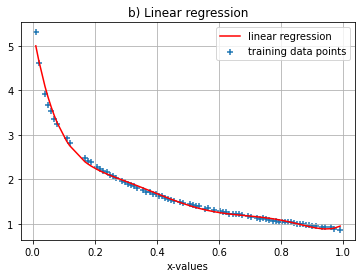

c) The root mean squared error: 0.05123989260441377


In [8]:
w = one_step_solution(data[0], 7)
print(f"a) The coeffs. obtained by the direct method:\n {w}")

plt.scatter([point[0] for point in data[0]],[point[1] for point in data[0]], marker='+', label = "training data points")
xs = sorted([point[0] for point in data[0]])
plt.plot(xs,[y(w, x) for x in xs], 'r', label = "linear regression")

dt_p = int(N*0.8)
#plt.text(0.15, 8, f'number of datapoints: {dt_p}')
#plt.text(0.15, 7, f'the root mean squared error: {err}')
plt.xlabel("x-values")
plt.grid(True)
plt.title("b) Linear regression")
plt.legend()
plt.show()

err = sqrt(sum([(point[1] - y(w, point[0]))**2/N for point in data[0]])) #error between the test points and the learned function
print(f'c) The root mean squared error: {err}')

## Implementation of second task
<div>
<b>Details:</b> 
The gradient descent iteration runs until the error falls below a desired walue, or until (numerical instabilities make) the error start to increase during the "descent".
</div>

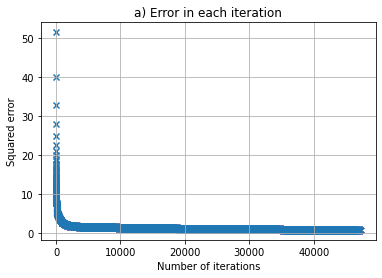

b) The obtained coeffs.:
[4.421680867831364, -13.074597436538307, 16.688536440003517, -1.3353507969429124, -7.53051231528044, -3.700647352249699, 5.395781958566298]


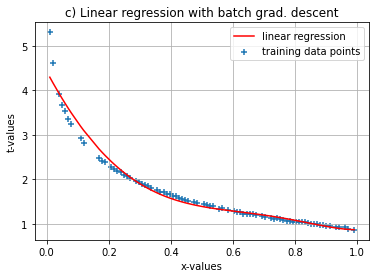

d) The RMS error:
0.1499997530406198
The differences between the one-step and grad. methods:
[0.9533005280707041, 27.049771634443324, 196.21053612699745, 610.5156233307074, 938.149340690173, 703.6994729489224, 206.0711910882059]


In [9]:
w_old = [np.random.uniform(-1.0, 1.0) for ponent in range(7)]
# Large initial error 
err = 9e3
err_old = 9e4
err_s = []
# The descent
while(err < err_old and 0.9 < err):
    err_old = err
    w_new = []
    grad = gradient_e(w_old, data[0])
    for j, wj in enumerate(w_old):
        w_new.append( wj - 0.0099*grad[j] )#eta is the learning rate
    err = calc_err(w_new, data[0]) #Squared error between the training points and the learned function
    w_old = w_new
    err_s.append(err)

plt.scatter(range(len(err_s)), err_s, marker='x')
plt.title('a) Error in each iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Squared error')
plt.grid(True)
plt.show()

print('b) The obtained coeffs.:')
print(w_old)

plt.scatter([point[0] for point in data[0]],[point[1] for point in data[0]], marker='+', label = "training data points")
xs = sorted([point[0] for point in data[0]])
plt.plot(xs,[y(w_old, x) for x in xs], 'r', label = "linear regression")

plt.xlabel("x-values")
plt.ylabel('t-values')
plt.grid(True)
plt.title("c) Linear regression with batch grad. descent")
plt.legend()
plt.show()

print('d) The RMS error:')
err_2 = sum([0.5*(y(w_old, point[0]) - point[1])**2 for point in data[0]])
RMSE_2 = sqrt(2*err_2/len(data[0]))
print(RMSE_2)

print('The differences between the one-step and grad. methods:')
diff_v = []
for j, w_j in enumerate(w):
    diff_v.append(abs(w_j-w_old[j]))
print(diff_v)


## Implementation of third task
<div>
<b>Details:</b> 
"Forcing" overfitting by approximating a higher order polinomial (greater than the number of datapoints).
</div>

## Example of overfitting


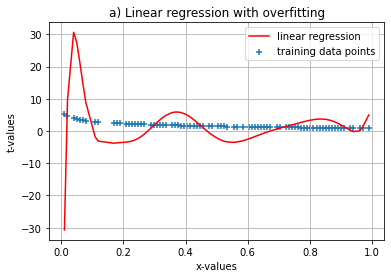

a) The coeffs of w:
[-108.26358687877655, 10342.911911010742, -290579.9814453125, 4093243.53515625, -34776109.0625, 194582541.75, -752800123.25, 2069189682.5, -4084385823.0, 5755835889.0, -5646257071.0, 3702303440.0, -1677487964.0, 807063511.5, -209359338.0, -1058268407.5, 2042182492.0, -1679899145.0, 670801386.0, -114851506.0, 36486058.5, -37504744.0, 19878564.0, -986622.0, -14645523.0, 9257124.25, -3760129.0, 7321542.9375, -3584432.0, 2369160.0, -1395438.0, -5327122.0, 7039988.0, -465306.0, -5191604.0, 2111354.75, -142227.0, 1620628.0, -1468762.0, -16532.0, -345586.75, 531214.0, 2060168.0, -704370.0, -759988.0, 1061362.0, 132138.0, -742162.5, -1567673.0, 1706178.0, 445115.0, -945368.0, -1549976.0, -138240.0, -179106.0, 331594.0, 638812.0, 1798972.0, -593394.0, 667451.5, -677942.0, 472520.0, 423494.0, -2013328.0, 120700.0, 802148.0, -1527460.5, 1381582.0, -1822899.25, 1730660.0, -85008.0, 939602.0, 1777916.0, -1799344.0, 1282008.0, -3029776.0, -444740.0, 1220480.0, 495906.0, -1746624.

In [10]:
print("## Example of overfitting")

w_3 = one_step_solution(data[0], 100)

plt.scatter([point[0] for point in data[0]],[point[1] for point in data[0]], marker='+', label = "training data points")
xs = sorted([point[0] for point in data[0]])
plt.plot(xs,[y(w_3, x) for x in xs], 'r', label = "linear regression")

plt.xlabel("x-values")
plt.ylabel('t-values')
plt.grid(True)
plt.title("a) Linear regression with overfitting")
plt.legend()
plt.show()

print('a) The coeffs of w:')
print(w_3)
print('b) The RMS error:')
err_3 = sum([0.5*(y(w_3, point[0]) - point[1])**2 for point in data[0]])
RMSE_3 = sqrt(2*err_3/len(data[0]))
print(RMSE_3)

## Implementation of fourth task
<div>
<b>Details:</b> 
Using the regularized one step solution with a range of lambda values and plotting the errors for the testing and training errors respectively.
</div>

a) The coeffs. obtained by the regularized direct method:
 [5.805131291504949, -67.13194548338652, 674.7858641147614, -4096.2973985672, 15081.293395996094, -34609.315200805664, 49750.07354736328, -43501.37384033203, 21136.089447021484, -4373.139873504639]
b) The root mean squared error: 0.021563535216122778


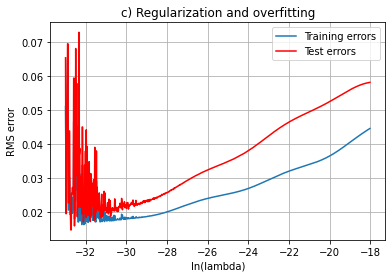

In [11]:
from math import exp

w4 = one_step_solution_regularized(data[0], exp(-29))
print(f"a) The coeffs. obtained by the regularized direct method:\n {w4}")

err4 = sqrt(sum([(point[1] - y(w4, point[0]))**2/N for point in data[0]]))
print(f'b) The root mean squared error: {err4}')

tr_err_s = []
test_err_s = []
lnLambd_s = []
for i in range(750):
    lnLambda = -33 + i/50
    lnLambd_s.append(lnLambda)
    w4 = one_step_solution_regularized(data[0], exp(lnLambda), 15)
    tr_err = sum([0.5*(y(w4, point[0]) - point[1])**2 for point in data[0]])
    tr_RMSE = sqrt(2*tr_err/len(data[0]))

    test_err = sum([0.5*(y(w4, point[0]) - point[1])**2 for point in data[1]])
    test_RMSE = sqrt(2*test_err/len(data[1]))


    test_err_s.append(test_RMSE)
    tr_err_s.append(tr_RMSE)


plt.plot(lnLambd_s, tr_err_s, label = "Training errors")
plt.plot(lnLambd_s, test_err_s, 'r', label = "Test errors")
plt.legend()
plt.grid(True)
plt.xlabel('ln(lambda)')
plt.ylabel('RMS error')
plt.title('c) Regularization and overfitting')
plt.show()
